# Redes Bayesianas
Las redes Bayesianas corresponden a un caso particular de factorización de una probabilidad conjunto en que cada factor es también una distribución.

El criterio para detectar independencia entre condicional en un grafo probabilístico corresponde a la d-separación, que nos dice que si $x_i$ y $x_j$ están bloqueados por un subconjunto $S \in X \setminus \{x_i,x_j\}$ de las variables, entonces $x_i$ es independiente de $x_j$ dado $S$. Esto nos lleva también a concluir que en un árbol, cada variable $x_i$ es independiente de sus hijos y sus abuelos, dado el valor de las variables en el conjunto $S$ que contiene a sus padres.


En general, podemos decir que podemos garantizar que $x_i \perp x_j \vert S$,si no existe ninguna ruta activa entre ambos vertices. Una ruta se dice activa si todas las tripletas que la componen se encuentran activas.

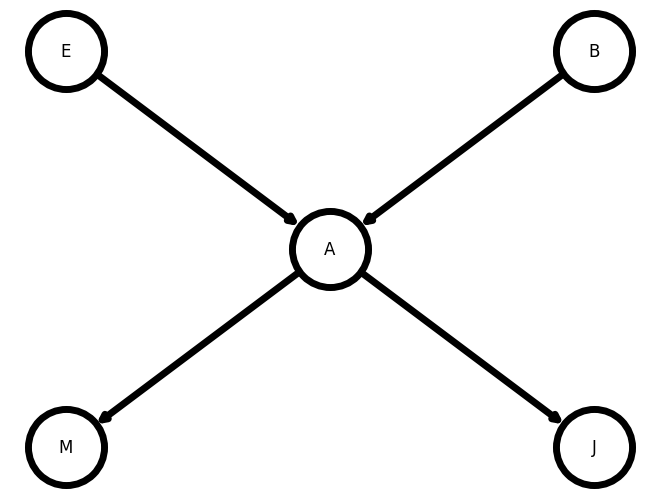

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()
G.add_edges_from([('B','A'),('E','A'),('A','J'),('A','M')])
pos={'A': (0,0),'B':(1,1),'J': (1,-1),'E': (-1,1),'M':(-1,-1)}
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw(G,pos=pos,**options)
nx.draw_networkx_labels(G,pos)
plt.show()


In [4]:
from networkx.algorithms.d_separation import is_d_separator

print('Efecto comun')
print('Tripleta inactiva', end = '=> ')
print('B _|_ E     : ',is_d_separator(G,{'B'},{'E'},set()))

print('Tripleta activa', end = '=> ')
print('B _|_ E | A : ',is_d_separator(G,{'B'},{'E'},{'A'}))

print('Tripleta activa', end = '=> ')
print('B _|_ E | J : ',is_d_separator(G,{'B'},{'E'},{'J'}))

print('--------------------')
print('Cadena causal')
print('Tripleta activa', end = '=> ')
print('B _|_ M     : ',is_d_separator(G,{'B'},{'M'},set()))

print('Tripleta inactiva', end = '=> ')
print('B _|_ M | A : ',is_d_separator(G,{'B'},{'M'},{'A'}))

print('--------------------')
print('Causa comun')
print('Tripleta activa', end = '=> ')
print('J _|_ M     : ',is_d_separator(G,{'J'},{'M'},set()))

print('Tripleta inactiva', end = '=> ')
print('J _|_ M | A : ',is_d_separator(G,{'J'},{'M'},{'A'}))

Efecto comun
Tripleta inactiva=> B _|_ E     :  True
Tripleta activa=> B _|_ E | A :  False
Tripleta activa=> B _|_ E | J :  False
--------------------
Cadena causal
Tripleta activa=> B _|_ M     :  False
Tripleta inactiva=> B _|_ M | A :  True
--------------------
Causa comun
Tripleta activa=> J _|_ M     :  False
Tripleta inactiva=> J _|_ M | A :  True


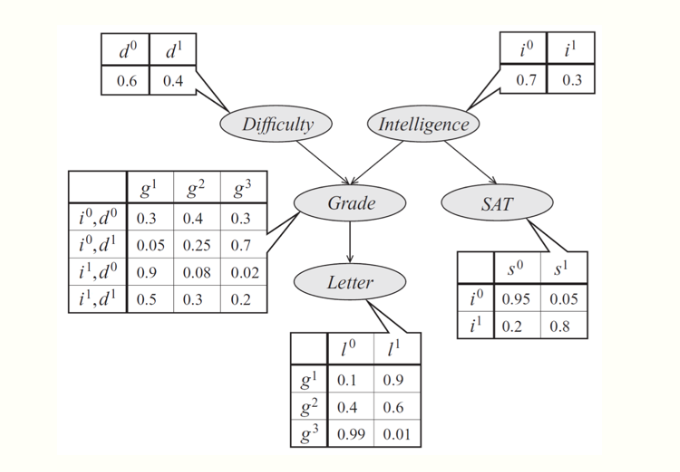

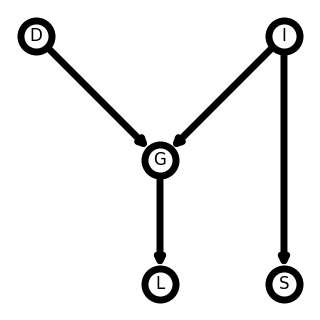

In [6]:
G_sat=nx.DiGraph()
G_sat.add_edges_from([('D','G'),('I','G'),('I','S'),('G','L')])
pos={'G': (0,0),'I':(1,1),'L': (0,-1),'D': (-1,1),'S':(1,-1)}
options = {
    "font_size": 36,
    "node_size": 500,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
plt.figure(2,figsize=(3,3))
nx.draw(G_sat,pos=pos,**options)
nx.draw_networkx_labels(G_sat,pos)
plt.show()

In [7]:
print('Cadena causal ')
print('Tripleta inactiva', end = '=> ')
print('D _|_ L     : ',is_d_separator(G_sat,{'D'},{'L'},set()))
print('Tripleta activa', end = '=> ')
print('D _|_ L | G    : ',is_d_separator(G_sat,{'D'},{'L'},{'G'}))

Cadena causal 
Tripleta inactiva=> D _|_ L     :  False
Tripleta activa=> D _|_ L | G    :  True


In [8]:
print('Efecto comun')
print('Tripleta inactiva', end = '=> ')
print('D _|_ I     : ',is_d_separator(G_sat,{'D'},{'I'},set()))
print('Tripleta activa', end = '=> ')
print('D _|_ I | L    : ',is_d_separator(G_sat,{'D'},{'I'},{'L'}))

Efecto comun
Tripleta inactiva=> D _|_ I     :  True
Tripleta activa=> D _|_ I | L    :  False


In [9]:
print('Ruta activa', end = '=> ')
print('L _|_ S     : ',is_d_separator(G_sat,{'L'},{'S'},set()))
print('Ruta inactiva', end = '=> ')
print('L _|_ S | G    : ',is_d_separator(G_sat,{'L'},{'S'},{'G'}))

Ruta activa=> L _|_ S     :  False
Ruta inactiva=> L _|_ S | G    :  True


In [11]:
print('Ruta activa', end = '=> ')
print('S _|_ D     : ',is_d_separator(G_sat,{'S'},{'D'},set()))
print('Ruta inactiva', end = '=> ')
print('S _|_ D | I    : ',is_d_separator(G_sat,{'S'},{'D'},{'I'}))

Ruta activa=> S _|_ D     :  True
Ruta inactiva=> S _|_ D | I    :  True


In [12]:
print('Ruta activa', end = '=> ')
print('G _|_ S     : ',is_d_separator(G_sat,{'S'},{'G'},set()))
print('G _|_ S   | I  : ',is_d_separator(G_sat,{'S'},{'G'},{'I'}))

Ruta activa=> G _|_ S     :  False
G _|_ S   | I  :  True


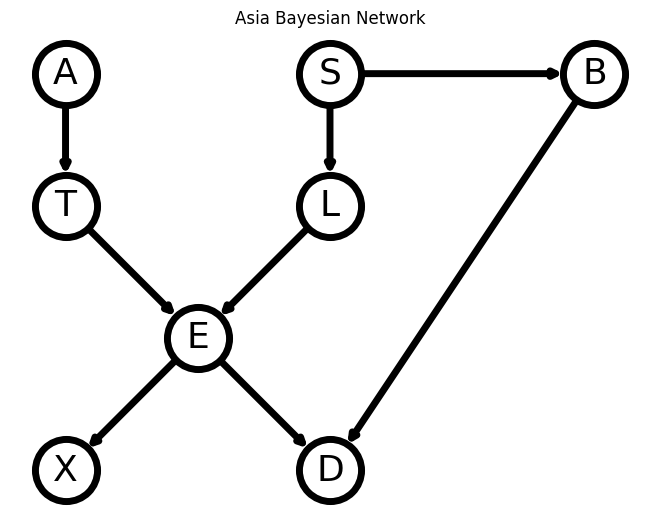

In [14]:
nodes = ['A', 'S', 'T', 'L', 'B', 'E', 'X', 'D']
edges = [('A', 'T'),
         ('S', 'L'),
         ('S', 'B'),
         ('T', 'E'),
         ('L', 'E'),
         ('E', 'X'),
         ('E', 'D'),
         ('B', 'D')]

# Create a directed graph using networkx
graph = nx.DiGraph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

# Define positions for the nodes for better visualization (optional)
pos = {
    'A': (0, 1),
    'S': (1, 1),
    'T': (0, 0),
    'L': (1, 0),
    'B': (2, 1),
    'E': (0.5, -1),
    'X': (0, -2),
    'D': (1, -2)
}

options = {
    "font_size": 26,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
# Draw the graph
nx.draw(graph, pos=pos, with_labels=True, **options)

# Display the plot
plt.title("Asia Bayesian Network")
plt.show()

In [16]:
for path in nx.all_simple_paths(graph.to_undirected(), source='A', target='S'):
    print(path)

['A', 'T', 'E', 'L', 'S']
['A', 'T', 'E', 'D', 'B', 'S']


In [21]:
print('Ruta inactiva', end = '=> ')
print('A _|_ S     : ',is_d_separator(graph,{'A'},{'S'},set()))
print('Ruta activa', end = '=> ')
print('A _|_ S | E    : ',is_d_separator(graph,{'A'},{'S'},{'E'}))

Ruta inactiva=> A _|_ S     :  True
Ruta activa=> A _|_ S | E    :  False


In [22]:
for path in nx.all_simple_paths(graph.to_undirected(), source='A', target='D'):
    print(path)

['A', 'T', 'E', 'L', 'S', 'B', 'D']
['A', 'T', 'E', 'D']


In [41]:
print('Ruta activa', end = '=> ')
print('A _|_ D     : ',is_d_separator(graph,{'A'},{'D'},set()))
print('Ruta activa', end = '=> ')
print('A _|_ D | B    : ',is_d_separator(graph,{'A'},{'D'},{'B'}))
print('Ruta activa', end = '=> ')
print('A _|_ D | E    : ',is_d_separator(graph,{'A'},{'D'},{'E'}))
print('Ruta inactiva', end = '=> ')
print('A _|_ D | T    : ',is_d_separator(graph,{'A'},{'D'},{'T'}))
print('Ruta inactiva', end = '=> ')
print('A _|_ D | E,B    : ',is_d_separator(graph,{'A'},{'D'},{'E','B'}))

Ruta activa=> A _|_ D     :  False
Ruta activa=> A _|_ D | B    :  False
Ruta activa=> A _|_ D | E    :  False
Ruta inactiva=> A _|_ D | T    :  True
Ruta inactiva=> A _|_ D | E,B    :  True


# Probabilistic Graphical Models

In [ ]:
! pip install --user pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00


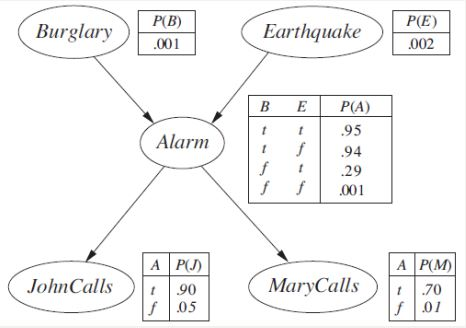

In [ ]:
from pgmpy.models import BayesianNetwork

alarm_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

# Defining the parameters using CPT
from pgmpy.factors.discrete import TabularCPD

cpd_burglary = TabularCPD(
    variable="Burglary", variable_card=2, values=[[0.999], [0.001]]
)
cpd_earthquake = TabularCPD(
    variable="Earthquake", variable_card=2, values=[[0.998], [0.002]]
)
cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)
cpd_johncalls = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.95, 0.1], [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2],
)
cpd_marycalls = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    values=[[0.99, 0.3], [0.01, 0.7]],
    evidence=["Alarm"],
    evidence_card=[2],
)

# Associating the parameters with the model structure
alarm_model.add_cpds(
    cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls
)

In [ ]:
alarm_model.get_independencies()

(JohnCalls ⟂ Earthquake, Burglary, MaryCalls | Alarm)
(JohnCalls ⟂ Earthquake, Burglary | Alarm, MaryCalls)
(JohnCalls ⟂ Burglary, MaryCalls | Earthquake, Alarm)
(JohnCalls ⟂ Earthquake, MaryCalls | Burglary, Alarm)
(JohnCalls ⟂ Burglary | Alarm, Earthquake, MaryCalls)
(JohnCalls ⟂ Earthquake | Alarm, Burglary, MaryCalls)
(JohnCalls ⟂ MaryCalls | Earthquake, Burglary, Alarm)
(MaryCalls ⟂ Earthquake, JohnCalls, Burglary | Alarm)
(MaryCalls ⟂ Earthquake, Burglary | JohnCalls, Alarm)
(MaryCalls ⟂ JohnCalls, Burglary | Earthquake, Alarm)
(MaryCalls ⟂ Earthquake, JohnCalls | Burglary, Alarm)
(MaryCalls ⟂ Burglary | Earthquake, JohnCalls, Alarm)
(MaryCalls ⟂ Earthquake | Alarm, JohnCalls, Burglary)
(MaryCalls ⟂ JohnCalls | Earthquake, Burglary, Alarm)
(Earthquake ⟂ Burglary)
(Earthquake ⟂ JohnCalls, MaryCalls | Alarm)
(Earthquake ⟂ JohnCalls | Alarm, MaryCalls)
(Earthquake ⟂ MaryCalls | JohnCalls, Alarm)
(Earthquake ⟂ JohnCalls, MaryCalls | Burglary, Alarm)
(Earthquake ⟂ JohnCalls | Alarm, B

In [ ]:
alarm_model.check_model()

True

In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(alarm_model)
e_dist = infer.query(['Earthquake'])
print(e_dist)

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9980 |
+---------------+-------------------+
| Earthquake(1) |            0.0020 |
+---------------+-------------------+


In [ ]:
infer = VariableElimination(alarm_model)
e_dist = infer.query(['Earthquake'],evidence={'Burglary': 1})
print(e_dist)

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9980 |
+---------------+-------------------+
| Earthquake(1) |            0.0020 |
+---------------+-------------------+


In [ ]:
ea_dist = infer.query(['Earthquake'],evidence={'Alarm': 1})
print(ea_dist)

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.7690 |
+---------------+-------------------+
| Earthquake(1) |            0.2310 |
+---------------+-------------------+


In [ ]:
eaj_dist = infer.query(['Earthquake'],evidence={'Alarm': 1,'JohnCalls':1})
print(eaj_dist)

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.7690 |
+---------------+-------------------+
| Earthquake(1) |            0.2310 |
+---------------+-------------------+


Ahora podemos establecer proabilidades sobre cualquier variable, dado un conjunto de variables observados:

$P(B | J=1,M=1)=\sum_A \sum_E p(B,J=1,M=1,A,E)$

Utilizando la factorizacion dada por el grafo obtenemos:

$P(B | J=1,M=1)= \alpha\, p(B) \underbrace{\sum_A P(M=1| A) P(J=1|A) \underbrace{\sum_E  P(A|E,B)P(E) }_{\phi_E(A,B)}}_{\phi_A(B)}$


$\phi_E(A,B)=\sum_E  P(A|E,B)P(E)$

In [ ]:
print(cpd_alarm)

+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.999         | 0.71          | 0.06          | 0.05          |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.001         | 0.29          | 0.94          | 0.95          |
+------------+---------------+---------------+---------------+---------------+


In [ ]:
print(cpd_earthquake)

+---------------+-------+
| Earthquake(0) | 0.998 |
+---------------+-------+
| Earthquake(1) | 0.002 |
+---------------+-------+


In [ ]:
import numpy as np

phi_e=np.array([[(0.999*0.998+0.71*0.002),(0.06*0.998+0.05*0.002)],
                [(0.001*0.998+0.29*0.002),(0.94*0.998+0.95*0.002)]])
alpha=np.sum(phi_e,axis=0)
phi_e=phi_e/alpha

In [ ]:
phi_e

array([[0.998422, 0.05998 ],
       [0.001578, 0.94002 ]])

$\phi_A(B)=\sum_A P(M=1| A) P(J=1|A)\phi_E(A,B)$

In [ ]:
print(cpd_marycalls)

+--------------+----------+----------+
| Alarm        | Alarm(0) | Alarm(1) |
+--------------+----------+----------+
| MaryCalls(0) | 0.99     | 0.3      |
+--------------+----------+----------+
| MaryCalls(1) | 0.01     | 0.7      |
+--------------+----------+----------+


In [ ]:
print(cpd_johncalls)

+--------------+----------+----------+
| Alarm        | Alarm(0) | Alarm(1) |
+--------------+----------+----------+
| JohnCalls(0) | 0.95     | 0.1      |
+--------------+----------+----------+
| JohnCalls(1) | 0.05     | 0.9      |
+--------------+----------+----------+


In [ ]:
import numpy as np

phi_a=np.array([
       [np.sum(np.multiply(np.multiply(cpd_marycalls.get_values()[1,:],
            cpd_johncalls.get_values()[1,:]),
            phi_e[:,0]))],
       [np.sum(np.multiply(np.multiply(cpd_marycalls.get_values()[1,:],
            cpd_johncalls.get_values()[1,:]),
            phi_e[:,1]))]
       ])

In [ ]:
ebjm_dist=np.multiply(cpd_burglary.get_values(),phi_a)
alpha=np.sum(ebjm_dist,axis=0)
ebjm_dist=ebjm_dist/alpha

In [ ]:
ebjm_dist

array([[0.71582816],
       [0.28417184]])

$P(B | J=1,M=1)= \alpha\, p(B) \phi_A(B)$

In [ ]:
ebjm_dist = infer.query(['Burglary'],evidence={'MaryCalls': 1,'JohnCalls':1})

In [ ]:
print(ebjm_dist)

+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.7158 |
+-------------+-----------------+
| Burglary(1) |          0.2842 |
+-------------+-----------------+


In [ ]:
ebjm_dist = infer.query(['Earthquake'],evidence={'MaryCalls': 1,'JohnCalls':1})

In [ ]:

print(ebjm_dist)

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.8239 |
+---------------+-------------------+
| Earthquake(1) |            0.1761 |
+---------------+-------------------+


In [ ]:
from pgmpy.inference.EliminationOrder import MinFill

MinFill(alarm_model).get_elimination_order(['Alarm', 'Earthquake'])

  0%|          | 0/2 [00:00<?, ?it/s]

['Earthquake', 'Alarm']

In [ ]:
infer.map_query(variables=["Burglary"], evidence={"MaryCalls": 1,'JohnCalls':1})

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'Burglary': 0}

## Tarea

Calcular $p(J | E=1)$

$P(J | E=1)= \alpha\, \sum_B \sum_A \sum_M p(B)P(M| A) P(J|A)  P(A|E=1,B)P(E=1)$

In [ ]:
from pgmpy.inference.EliminationOrder import MinFill

MinFill(alarm_model).get_elimination_order(['Alarm', 'MaryCalls','Burglary'])

  0%|          | 0/3 [00:00<?, ?it/s]

['Burglary', 'MaryCalls', 'Alarm']

$P(J | E=1)= \alpha\, \underbrace{\sum_A P(J|A) \underbrace{\sum_B  P(A|E=1,B)P(E=1)P(B) }_{\phi_B(A)}  \underbrace{\sum_M P(M| A)}_{\phi_M(A)}}_{\phi_A(J)}$

In [ ]:
print(cpd_marycalls)

+--------------+----------+----------+
| Alarm        | Alarm(0) | Alarm(1) |
+--------------+----------+----------+
| MaryCalls(0) | 0.99     | 0.3      |
+--------------+----------+----------+
| MaryCalls(1) | 0.01     | 0.7      |
+--------------+----------+----------+


In [ ]:
je_dist = infer.query(['MaryCalls'],evidence={'Earthquake': 1})
print(je_dist)

+--------------+------------------+
| MaryCalls    |   phi(MaryCalls) |
+==============+==================+
| MaryCalls(0) |           0.7894 |
+--------------+------------------+
| MaryCalls(1) |           0.2106 |
+--------------+------------------+


# Red Asia Usando PGMPY

In [ ]:
! pip install --user pgmpy
! pip install --user  wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8c978418f7da7c91c86432047f44f50e7dd84da083091ddd91f82959674b05c0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
import gzip
f = wget.download('http://www.bnlearn.com/bnrepository/asia/asia.bif.gz')
with gzip.open('asia.bif.gz', mode='rb') as f:
    file_content=f.read()
with open('asia.bif', mode='wb') as f:
    f.write(file_content)

In [ ]:
from pgmpy.readwrite import BIFReader
reader = BIFReader('asia.bif')
!rm asia.bif
!rm asia.bif.gz
model = reader.get_model()

In [ ]:
#reader=BIFReader('data/asia.bif')
#model=reader.get_model()

In [ ]:
model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

In [ ]:
infer = VariableElimination(model)
e_dist = infer.query(['dysp'])
print(e_dist)

+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.4360 |
+-----------+-------------+
| dysp(no)  |      0.5640 |
+-----------+-------------+


In [ ]:
MinFill(model).get_elimination_order(['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray'])

  0%|          | 0/7 [00:00<?, ?it/s]

['bronc', 'tub', 'asia', 'smoke', 'xray', 'either', 'lung']

In [ ]:
model.is_active_trail('tub', 'smoke', observed='dysp')

True

In [ ]:
model.is_active_trail('tub', 'smoke')

False

In [ ]:
model.is_active_trail('lung', 'bronc', observed='smoke')

False

In [ ]:
model.is_active_trail('asia', 'smoke', observed='lung')

False

In [ ]:
model.is_active_trail('asia', 'smoke', observed=['lung','dysp'])

True

In [ ]:
model.is_active_trail('lung', 'tub', observed='either')

True

In [ ]:
model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

In [ ]:
from pgmpy.inference import BeliefPropagation

jtree=BeliefPropagation(model)

In [ ]:
for clique in jtree.get_cliques():
  print(clique)

('tub', 'xray', 'lung', 'dysp', 'asia', 'smoke')
('tub', 'xray', 'lung', 'dysp', 'bronc', 'smoke')
('tub', 'xray', 'lung', 'dysp', 'bronc', 'either')


In [ ]:
q=model.get_cpds(node='asia')
print(q)

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+


In [ ]:
q=jtree.query(variables=['dysp'],evidence={},joint=False)
for factor in q.values():
    print(factor)

+---------+-------------+
| dysp    |   phi(dysp) |
+=========+=============+
| dysp(0) |      0.4360 |
+---------+-------------+
| dysp(1) |      0.5640 |
+---------+-------------+


In [ ]:
q=jtree.query(variables=['asia'],evidence={'dysp':1},joint=False)
for factor in q.values():
    print(factor)

Eliminating: smoke: 100%|██████████| 6/6 [00:00<00:00, 249.56it/s]

+-----------+-------------+
| asia      |   phi(asia) |
+===========+=============+
| asia(yes) |      0.0097 |
+-----------+-------------+
| asia(no)  |      0.9903 |
+-----------+-------------+
